# Importing Libraries

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Setting Initial pandas parameters

In [347]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading in the input datasets

In [348]:
set1=pd.read_csv('training_set_features.csv')
set1.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [349]:
set2=pd.read_csv('training_set_labels.csv')
set2.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


## Looking at the unique values in each of the columns

In [350]:
for i in np.arange(1,36,1):
    print("\n")
    print(set1.columns[i])
    print(set1[set1.columns[i]].unique())



xyz_concern
[ 1.  3.  2.  0. nan]


xyz_knowledge
[ 0.  2.  1. nan]


behavioral_antiviral_meds
[ 0.  1. nan]


behavioral_avoidance
[ 0.  1. nan]


behavioral_face_mask
[ 0.  1. nan]


behavioral_wash_hands
[ 0.  1. nan]


behavioral_large_gatherings
[ 0.  1. nan]


behavioral_outside_home
[ 1.  0. nan]


behavioral_touch_face
[ 1.  0. nan]


doctor_recc_xyz
[ 0. nan  1.]


doctor_recc_seasonal
[ 0. nan  1.]


chronic_med_condition
[ 0.  1. nan]


child_under_6_months
[ 0.  1. nan]


health_worker
[ 0.  1. nan]


health_insurance
[ 1. nan  0.]


opinion_xyz_vacc_effective
[ 3.  5.  4.  2.  1. nan]


opinion_xyz_risk
[ 1.  4.  3.  2.  5. nan]


opinion_xyz_sick_from_vacc
[ 2.  4.  1.  5.  3. nan]


opinion_seas_vacc_effective
[ 2.  4.  5.  3.  1. nan]


opinion_seas_risk
[ 1.  2.  4.  3.  5. nan]


opinion_seas_sick_from_vacc
[ 2.  4.  1.  5. nan  3.]


age_group
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']


education
['< 12 Years' '12 Years' 'Colle

In [351]:
for i in np.arange(1,33,1):
    print(set1.columns[i],"\t:\t",len(set1[set1.columns[i]].unique()))

xyz_concern 	:	 5
xyz_knowledge 	:	 4
behavioral_antiviral_meds 	:	 3
behavioral_avoidance 	:	 3
behavioral_face_mask 	:	 3
behavioral_wash_hands 	:	 3
behavioral_large_gatherings 	:	 3
behavioral_outside_home 	:	 3
behavioral_touch_face 	:	 3
doctor_recc_xyz 	:	 3
doctor_recc_seasonal 	:	 3
chronic_med_condition 	:	 3
child_under_6_months 	:	 3
health_worker 	:	 3
health_insurance 	:	 3
opinion_xyz_vacc_effective 	:	 6
opinion_xyz_risk 	:	 6
opinion_xyz_sick_from_vacc 	:	 6
opinion_seas_vacc_effective 	:	 6
opinion_seas_risk 	:	 6
opinion_seas_sick_from_vacc 	:	 6
age_group 	:	 5
education 	:	 5
race 	:	 4
sex 	:	 2
income_poverty 	:	 4
marital_status 	:	 3
rent_or_own 	:	 3
employment_status 	:	 4
hhs_geo_region 	:	 10
census_msa 	:	 3
household_adults 	:	 5


In [352]:
df_xyz = set1.copy()
df_seasonal = set1.copy()

In [353]:
df_xyz['class'] = set2['xyz_vaccine']
df_seasonal['class'] = set2['seasonal_vaccine']

In [354]:
df_xyz.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,class
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [355]:
df_seasonal.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,class
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [356]:
df_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [357]:
df_xyz.shape

(26707, 37)

In [358]:
df_xyz.drop('respondent_id',axis=1,inplace=True)
df_seasonal.drop('respondent_id',axis=1,inplace=True)

In [359]:
df_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [360]:
a=df_xyz.isnull().sum()
z=a.values.astype('float')

z=(z/26707.0)*100.0

s=pd.Series(z,a.index)
print("Percentage Null Values: ")
s

Percentage Null Values: 


xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [361]:
df_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   



xyz_concern
[ 1.  3.  2.  0. nan]


xyz_knowledge
[ 0.  2.  1. nan]


behavioral_antiviral_meds
[ 0.  1. nan]


behavioral_avoidance
[ 0.  1. nan]


behavioral_face_mask
[ 0.  1. nan]


behavioral_wash_hands
[ 0.  1. nan]


behavioral_large_gatherings
[ 0.  1. nan]


behavioral_outside_home
[ 1.  0. nan]


behavioral_touch_face
[ 1.  0. nan]


doctor_recc_xyz
[ 0. nan  1.]


doctor_recc_seasonal
[ 0. nan  1.]


chronic_med_condition
[ 0.  1. nan]


child_under_6_months
[ 0.  1. nan]


health_worker
[ 0.  1. nan]


health_insurance
[ 1. nan  0.]


opinion_xyz_vacc_effective
[ 3.  5.  4.  2.  1. nan]


opinion_xyz_risk
[ 1.  4.  3.  2.  5. nan]


opinion_xyz_sick_from_vacc
[ 2.  4.  1.  5.  3. nan]


opinion_seas_vacc_effective
[ 2.  4.  5.  3.  1. nan]


opinion_seas_risk
[ 1.  2.  4.  3.  5. nan]


opinion_seas_sick_from_vacc
[ 2.  4.  1.  5. nan  3.]


age_group
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']


education
['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]


race
['White' 'Black' 'Other or Multiple' 'Hispanic']


sex
['Female' 'Male']


income_poverty
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]


marital_status
['Not Married' 'Married' nan]


rent_or_own
['Own' 'Rent' nan]


employment_status
['Not in Labor Force' 'Employed' 'Unemployed' nan]


hhs_geo_region
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']


census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


household_adults
[ 0.  2.  1.  3. nan]

household_children
[ 0.  3.  2.  1. nan]


employment_industry
[nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo' 'cfqqtusy'
 'mcubkhph' 'haxffmxo' 'qnlwzans']


employment_occupation
[nan 'xgwztkwe' 'xtkaffoo' 'emcorrxb' 'vlluhbov' 'xqwwgdyp' 'ccgxvspp'
 'qxajmpny' 'kldqjyjy' 'mxkfnird' 'hfxkjkmi' 'bxpfxfdn' 'ukymxvdu'
 'cmhcxjea' 'haliazsg' 'dlvbwzss' 'xzmlyyjv' 'oijqvulv' 'rcertsgn'
 'tfqavkke' 'hodpvpew' 'uqqtjvyb' 'pvmttkik' 'dcjcmpih']

In [362]:
age_map = dict(
    {
        '55 - 64 Years' : 3.0 ,
        '35 - 44 Years' : 1.0 ,
        '18 - 34 Years' : 0.0 ,
        '65+ Years' : 4.0 ,
        '45 - 54 Years' : 2.0
    }
)

In [363]:
df_xyz['age_group']=df_xyz['age_group'].map(age_map, na_action='ignore')
df_seasonal['age_group']=df_seasonal['age_group'].map(age_map, na_action='ignore')

In [364]:
education_map = dict(
    {
        '< 12 Years' : 0.0 ,
        '12 Years' : 1.0 ,
        'College Graduate' : 2.0 ,
        'Some College' : 3.0
    }
)

In [365]:
df_xyz['education']=df_xyz['education'].map(education_map, na_action='ignore')
df_seasonal['education']=df_seasonal['education'].map(education_map, na_action='ignore')

In [366]:
df_xyz['education'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [367]:
race_map = dict(
    {
        'White' : 'a' ,
        'Black' : 'b' ,
        'Other or Multiple' : 'c' ,
        'Hispanic' : 'd'
    }
)

In [368]:
df_xyz['race']=df_xyz['race'].map(race_map, na_action='ignore')
df_seasonal['race']=df_seasonal['race'].map(race_map, na_action='ignore')

df_xyz['race'] = df_xyz['race'].astype('category')
df_seasonal['race'] = df_seasonal['race'].astype('category')

In [369]:
sex_map = dict(
    {
        'Male' : 0.0 ,
        'Female' : 1.0
    }
)

In [370]:
df_xyz['sex']=df_xyz['sex'].map(sex_map,na_action='ignore')
df_seasonal['sex']=df_seasonal['sex'].map(sex_map,na_action='ignore')

In [371]:
income_map = dict(
    {
        'Below Poverty' : 0.0 , 
        '<= $75,000, Above Poverty' : 1.0 ,
        '> $75,000' : 2.0
    }
)

In [372]:
df_xyz['income_poverty'] = df_xyz['income_poverty'].map(income_map, na_action='ignore')
df_seasonal['income_poverty'] = df_seasonal['income_poverty'].map(income_map, na_action='ignore')

In [373]:
marital_map = dict(
    {
        'Not Married' : 0.0 ,
        'Married' : 1.0
    }
)

In [374]:
df_xyz['marital_status'] = df_xyz['marital_status'].map(marital_map, na_action='ignore')
df_seasonal['marital_status'] = df_seasonal['marital_status'].map(marital_map, na_action='ignore')

In [375]:
rent_map=dict(
    {
        'Own' : 0.0 ,
        'Rent' : 1.0
    }
)

In [376]:
df_xyz['rent_or_own'] = df_xyz['rent_or_own'].map(rent_map, na_action='ignore')
df_seasonal['rent_or_own'] = df_seasonal['rent_or_own'].map(rent_map, na_action='ignore')

In [377]:
employment_map = dict(
    {
        'Not in Labor Force' : 2.0 ,
        'Employed' : 1.0 ,
        'Unemployed' : 0.0
    }
)

In [378]:
df_xyz['employment_status'] = df_xyz['employment_status'].map(employment_map, na_action='ignore')
df_seasonal['employment_status'] = df_seasonal['employment_status'].map(employment_map, na_action='ignore')

In [379]:
df_xyz['employment_status'].unique()

array([ 2.,  1.,  0., nan])

In [380]:
region_map = dict(
    {
        'oxchjgsf' : 'a' , 
        'bhuqouqj' : 'b' ,
        'qufhixun' : 'c' ,
        'lrircsnp' : 'd' ,
        'atmpeygn' : 'e' ,
        'lzgpxyit' : 'f' ,
        'fpwskwrf' : 'g' ,
        'mlyzmhmf' : 'h' ,
        'dqpwygqj' : 'i' ,
        'kbazzjca' : 'j'
    }
)

In [381]:
df_xyz['hhs_geo_region'] = df_xyz['hhs_geo_region'].map(region_map,na_action='ignore')
df_seasonal['hhs_geo_region'] = df_seasonal['hhs_geo_region'].map(region_map,na_action='ignore')

In [382]:
df_xyz['hhs_geo_region'] = df_xyz['hhs_geo_region'].astype('category')
df_seasonal['hhs_geo_region'] = df_seasonal['hhs_geo_region'].astype('category')

In [383]:
census_map = dict(
    {
        'Non-MSA' : 0.0,
        'MSA, Not Principle  City' : 1.0 ,
        'MSA, Principle City' : 2.0
    }
)

In [384]:
df_xyz['census_msa']=df_xyz['census_msa'].map(census_map,na_action='ignore')
df_seasonal['census_msa']=df_seasonal['census_msa'].map(census_map,na_action='ignore')

In [385]:
industry_map = dict(
    {
        'pxcmvdjn' :'a',
        'rucpziij' :'b',
        'wxleyezf' :'c',
        'saaquncn' :'d',
        'xicduogh' :'e',
        'ldnlellj' :'f',
        'wlfvacwt' :'g',
        'nduyfdeo' :'h',
        'fcxhlnwr' :'i',
        'vjjrobsf' :'j',
        'arjwrbjb' :'k',
        'atmlpfrs' :'l',
        'msuufmds' :'m',
        'xqicxuve' :'n',
        'phxvnwax' :'o',
        'dotnnunm' :'p',
        'mfikgejo' :'q',
        'cfqqtusy' :'r',
        'mcubkhph' :'s',
        'haxffmxo' :'t',
        'qnlwzans' :'u'
    }
)

In [386]:
df_xyz['employment_industry']=df_xyz['employment_industry'].map(industry_map,na_action='ignore')
df_seasonal['employment_industry']=df_seasonal['employment_industry'].map(industry_map,na_action='ignore')

In [387]:
df_xyz['employment_industry'] = df_xyz['employment_industry'].astype('category')
df_seasonal['employment_industry'] = df_seasonal['employment_industry'].astype('category')

In [388]:
occupation_map = dict(
    {
        'xgwztkwe' : 'a' ,
        'xtkaffoo' : 'b' ,
        'emcorrxb' : 'c' ,
        'vlluhbov' : 'd' ,
        'xqwwgdyp' : 'e' ,
        'ccgxvspp' : 'f' ,
        'qxajmpny' : 'g' ,
        'kldqjyjy' : 'h' ,
        'mxkfnird' : 'i' ,
        'hfxkjkmi' : 'j' ,
        'bxpfxfdn' : 'k' ,
        'ukymxvdu' : 'l' ,
        'cmhcxjea' : 'm' ,
        'haliazsg' : 'n' ,
        'dlvbwzss' : 'o' ,
        'xzmlyyjv' : 'p' ,
        'oijqvulv' : 'q' ,
        'rcertsgn' : 'r' ,
        'tfqavkke' : 's' ,
        'hodpvpew' : 't' ,
        'uqqtjvyb' : 'u' ,
        'pvmttkik' : 'v' ,
        'dcjcmpih' : 'w'
    }
)

In [389]:
df_xyz['employment_occupation'] = df_xyz['employment_occupation'].map(occupation_map,na_action='ignore')
df_seasonal['employment_occupation'] = df_seasonal['employment_occupation'].map(occupation_map,na_action='ignore')

In [390]:
df_xyz['employment_occupation'] = df_xyz['employment_occupation'].astype('category')
df_seasonal['employment_occupation'] = df_seasonal['employment_occupation'].astype('category')

In [391]:
for i in np.arange(1,len(df_xyz.columns),1):
    print("\n")
    print(df_xyz.columns[i])
    print(df_xyz[df_xyz.columns[i]].unique())



xyz_knowledge
[ 0.  2.  1. nan]


behavioral_antiviral_meds
[ 0.  1. nan]


behavioral_avoidance
[ 0.  1. nan]


behavioral_face_mask
[ 0.  1. nan]


behavioral_wash_hands
[ 0.  1. nan]


behavioral_large_gatherings
[ 0.  1. nan]


behavioral_outside_home
[ 1.  0. nan]


behavioral_touch_face
[ 1.  0. nan]


doctor_recc_xyz
[ 0. nan  1.]


doctor_recc_seasonal
[ 0. nan  1.]


chronic_med_condition
[ 0.  1. nan]


child_under_6_months
[ 0.  1. nan]


health_worker
[ 0.  1. nan]


health_insurance
[ 1. nan  0.]


opinion_xyz_vacc_effective
[ 3.  5.  4.  2.  1. nan]


opinion_xyz_risk
[ 1.  4.  3.  2.  5. nan]


opinion_xyz_sick_from_vacc
[ 2.  4.  1.  5.  3. nan]


opinion_seas_vacc_effective
[ 2.  4.  5.  3.  1. nan]


opinion_seas_risk
[ 1.  2.  4.  3.  5. nan]


opinion_seas_sick_from_vacc
[ 2.  4.  1.  5. nan  3.]


age_group
[3. 1. 0. 4. 2.]


education
[ 0.  1.  2.  3. nan]


race
['a', 'b', 'c', 'd']
Categories (4, object): ['a', 'b', 'c', 'd']


sex
[1. 0.]


income_poverty
[ 0

In [392]:
for i in np.arange(1,len(df_xyz.columns),1):
    print("\n")
    print(df_seasonal.columns[i])
    print(df_seasonal[df_seasonal.columns[i]].unique())



xyz_knowledge
[ 0.  2.  1. nan]


behavioral_antiviral_meds
[ 0.  1. nan]


behavioral_avoidance
[ 0.  1. nan]


behavioral_face_mask
[ 0.  1. nan]


behavioral_wash_hands
[ 0.  1. nan]


behavioral_large_gatherings
[ 0.  1. nan]


behavioral_outside_home
[ 1.  0. nan]


behavioral_touch_face
[ 1.  0. nan]


doctor_recc_xyz
[ 0. nan  1.]


doctor_recc_seasonal
[ 0. nan  1.]


chronic_med_condition
[ 0.  1. nan]


child_under_6_months
[ 0.  1. nan]


health_worker
[ 0.  1. nan]


health_insurance
[ 1. nan  0.]


opinion_xyz_vacc_effective
[ 3.  5.  4.  2.  1. nan]


opinion_xyz_risk
[ 1.  4.  3.  2.  5. nan]


opinion_xyz_sick_from_vacc
[ 2.  4.  1.  5.  3. nan]


opinion_seas_vacc_effective
[ 2.  4.  5.  3.  1. nan]


opinion_seas_risk
[ 1.  2.  4.  3.  5. nan]


opinion_seas_sick_from_vacc
[ 2.  4.  1.  5. nan  3.]


age_group
[3. 1. 0. 4. 2.]


education
[ 0.  1.  2.  3. nan]


race
['a', 'b', 'c', 'd']
Categories (4, object): ['a', 'b', 'c', 'd']


sex
[1. 0.]


income_poverty
[ 0

In [393]:
for i in range(len(df_xyz.columns)):
    print(df_xyz[df_xyz.columns[i]].value_counts())
    print("\n")

xyz_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64


xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64


behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64


behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64


behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64


behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64


behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64


behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64


behavioral_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64


doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64


doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64


chronic_med_condition
0.0    18446
1.0     7290
Name: count, dtype: int64


child_under_6_months
0.0    23749
1.0     2138
Name: count, dtyp

In [394]:
for i in range(len(df_seasonal.columns)):
    print(df_seasonal[df_seasonal.columns[i]].value_counts())
    print("\n")

xyz_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64


xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64


behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64


behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64


behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64


behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64


behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64


behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64


behavioral_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64


doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64


doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64


chronic_med_condition
0.0    18446
1.0     7290
Name: count, dtype: int64


child_under_6_months
0.0    23749
1.0     2138
Name: count, dtyp

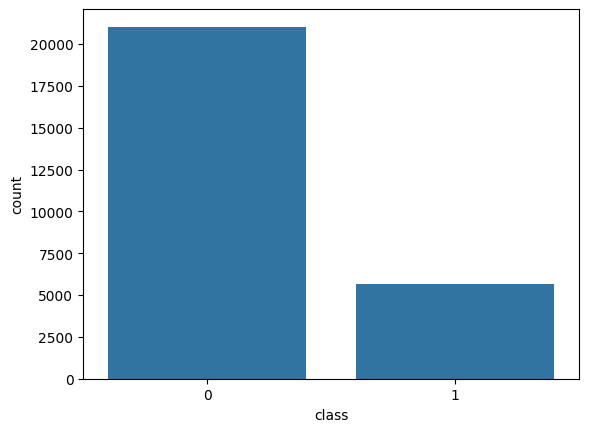

In [395]:
sns.barplot(df_xyz['class'].value_counts());

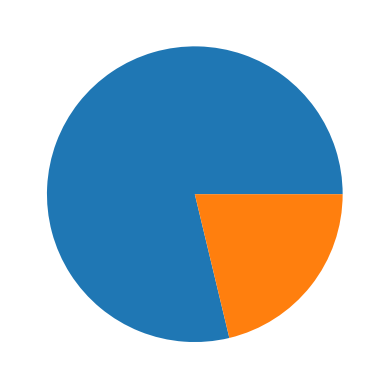

In [396]:
plt.pie(df_xyz['class'].value_counts());

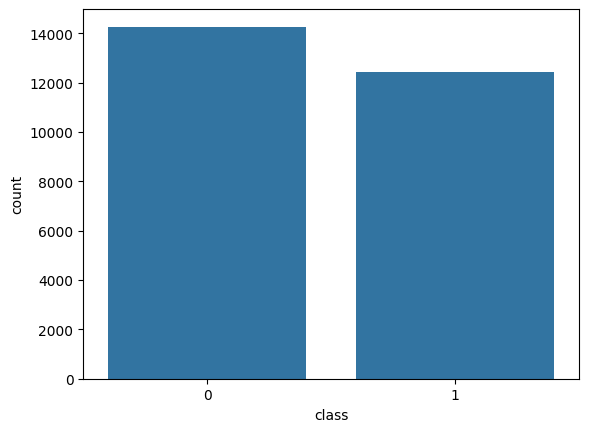

In [397]:
sns.barplot(df_seasonal['class'].value_counts());

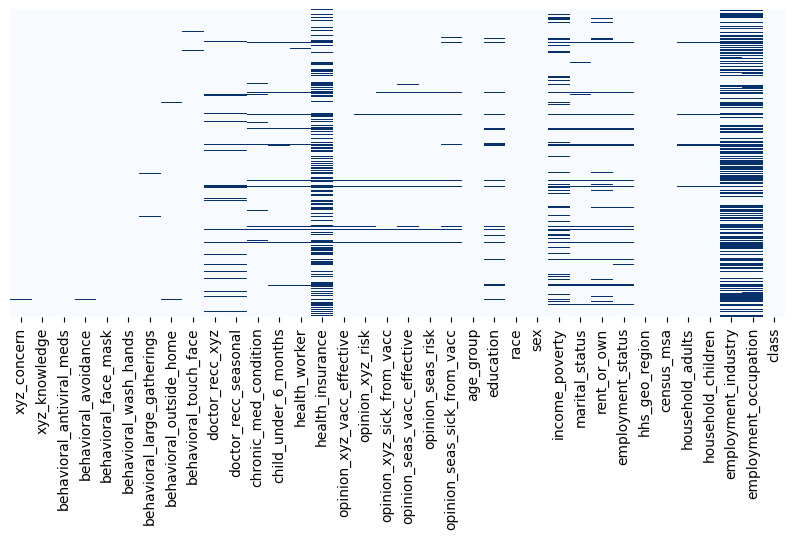

In [398]:
plt.figure(figsize=(10,4))
sns.heatmap(df_xyz.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df_xyz.columns);

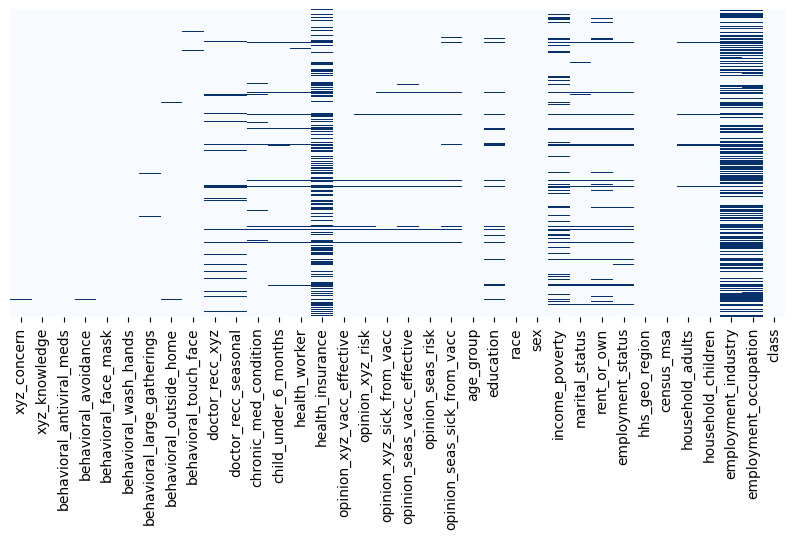

In [399]:
plt.figure(figsize=(10,4))
sns.heatmap(df_seasonal.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df_seasonal.columns);

In [400]:
df_xyz.info(), df_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   xyz_concern                  26615 non-null  float64 
 1   xyz_knowledge                26591 non-null  float64 
 2   behavioral_antiviral_meds    26636 non-null  float64 
 3   behavioral_avoidance         26499 non-null  float64 
 4   behavioral_face_mask         26688 non-null  float64 
 5   behavioral_wash_hands        26665 non-null  float64 
 6   behavioral_large_gatherings  26620 non-null  float64 
 7   behavioral_outside_home      26625 non-null  float64 
 8   behavioral_touch_face        26579 non-null  float64 
 9   doctor_recc_xyz              24547 non-null  float64 
 10  doctor_recc_seasonal         24547 non-null  float64 
 11  chronic_med_condition        25736 non-null  float64 
 12  child_under_6_months         25887 non-null  float64 
 13  h

(None, None)

In [401]:
from sklearn.preprocessing import LabelEncoder

le_race = LabelEncoder()
le_region = LabelEncoder()
le_industry = LabelEncoder()
le_occupation = LabelEncoder()

In [402]:
df_xyz['race']=le_race.fit_transform(df_xyz['race'])
df_seasonal['race']=le_race.fit_transform(df_seasonal['race'])

df_xyz['hhs_geo_region']=le_region.fit_transform(df_xyz['hhs_geo_region'])
df_seasonal['hhs_geo_region']=le_region.fit_transform(df_seasonal['hhs_geo_region'])

df_xyz['employment_industry']=le_industry.fit_transform(df_xyz['employment_industry'])
df_seasonal['employment_industry']=le_industry.fit_transform(df_seasonal['employment_industry'])

df_xyz['employment_occupation']=le_occupation.fit_transform(df_xyz['employment_occupation'])
df_seasonal['employment_occupation']=le_occupation.fit_transform(df_seasonal['employment_occupation'])

In [403]:
for i in range(len(df_xyz.columns)):
    df_xyz[df_xyz.columns[i]] = df_xyz[df_xyz.columns[i]].astype('category')
    df_seasonal[df_seasonal.columns[i]] = df_seasonal[df_seasonal.columns[i]].astype('category')

In [404]:
for i in np.arange(0,len(df_xyz.columns),1):
    print("\n")
    print(df_seasonal.columns[i])
    print(df_seasonal[df_seasonal.columns[i]].unique())



xyz_concern
[1.0, 3.0, 2.0, 0.0, NaN]
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]


xyz_knowledge
[0.0, 2.0, 1.0, NaN]
Categories (3, float64): [0.0, 1.0, 2.0]


behavioral_antiviral_meds
[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]


behavioral_avoidance
[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]


behavioral_face_mask
[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]


behavioral_wash_hands
[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]


behavioral_large_gatherings
[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]


behavioral_outside_home
[1.0, 0.0, NaN]
Categories (2, float64): [0.0, 1.0]


behavioral_touch_face
[1.0, 0.0, NaN]
Categories (2, float64): [0.0, 1.0]


doctor_recc_xyz
[0.0, NaN, 1.0]
Categories (2, float64): [0.0, 1.0]


doctor_recc_seasonal
[0.0, NaN, 1.0]
Categories (2, float64): [0.0, 1.0]


chronic_med_condition
[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]


child_under_6_months
[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0

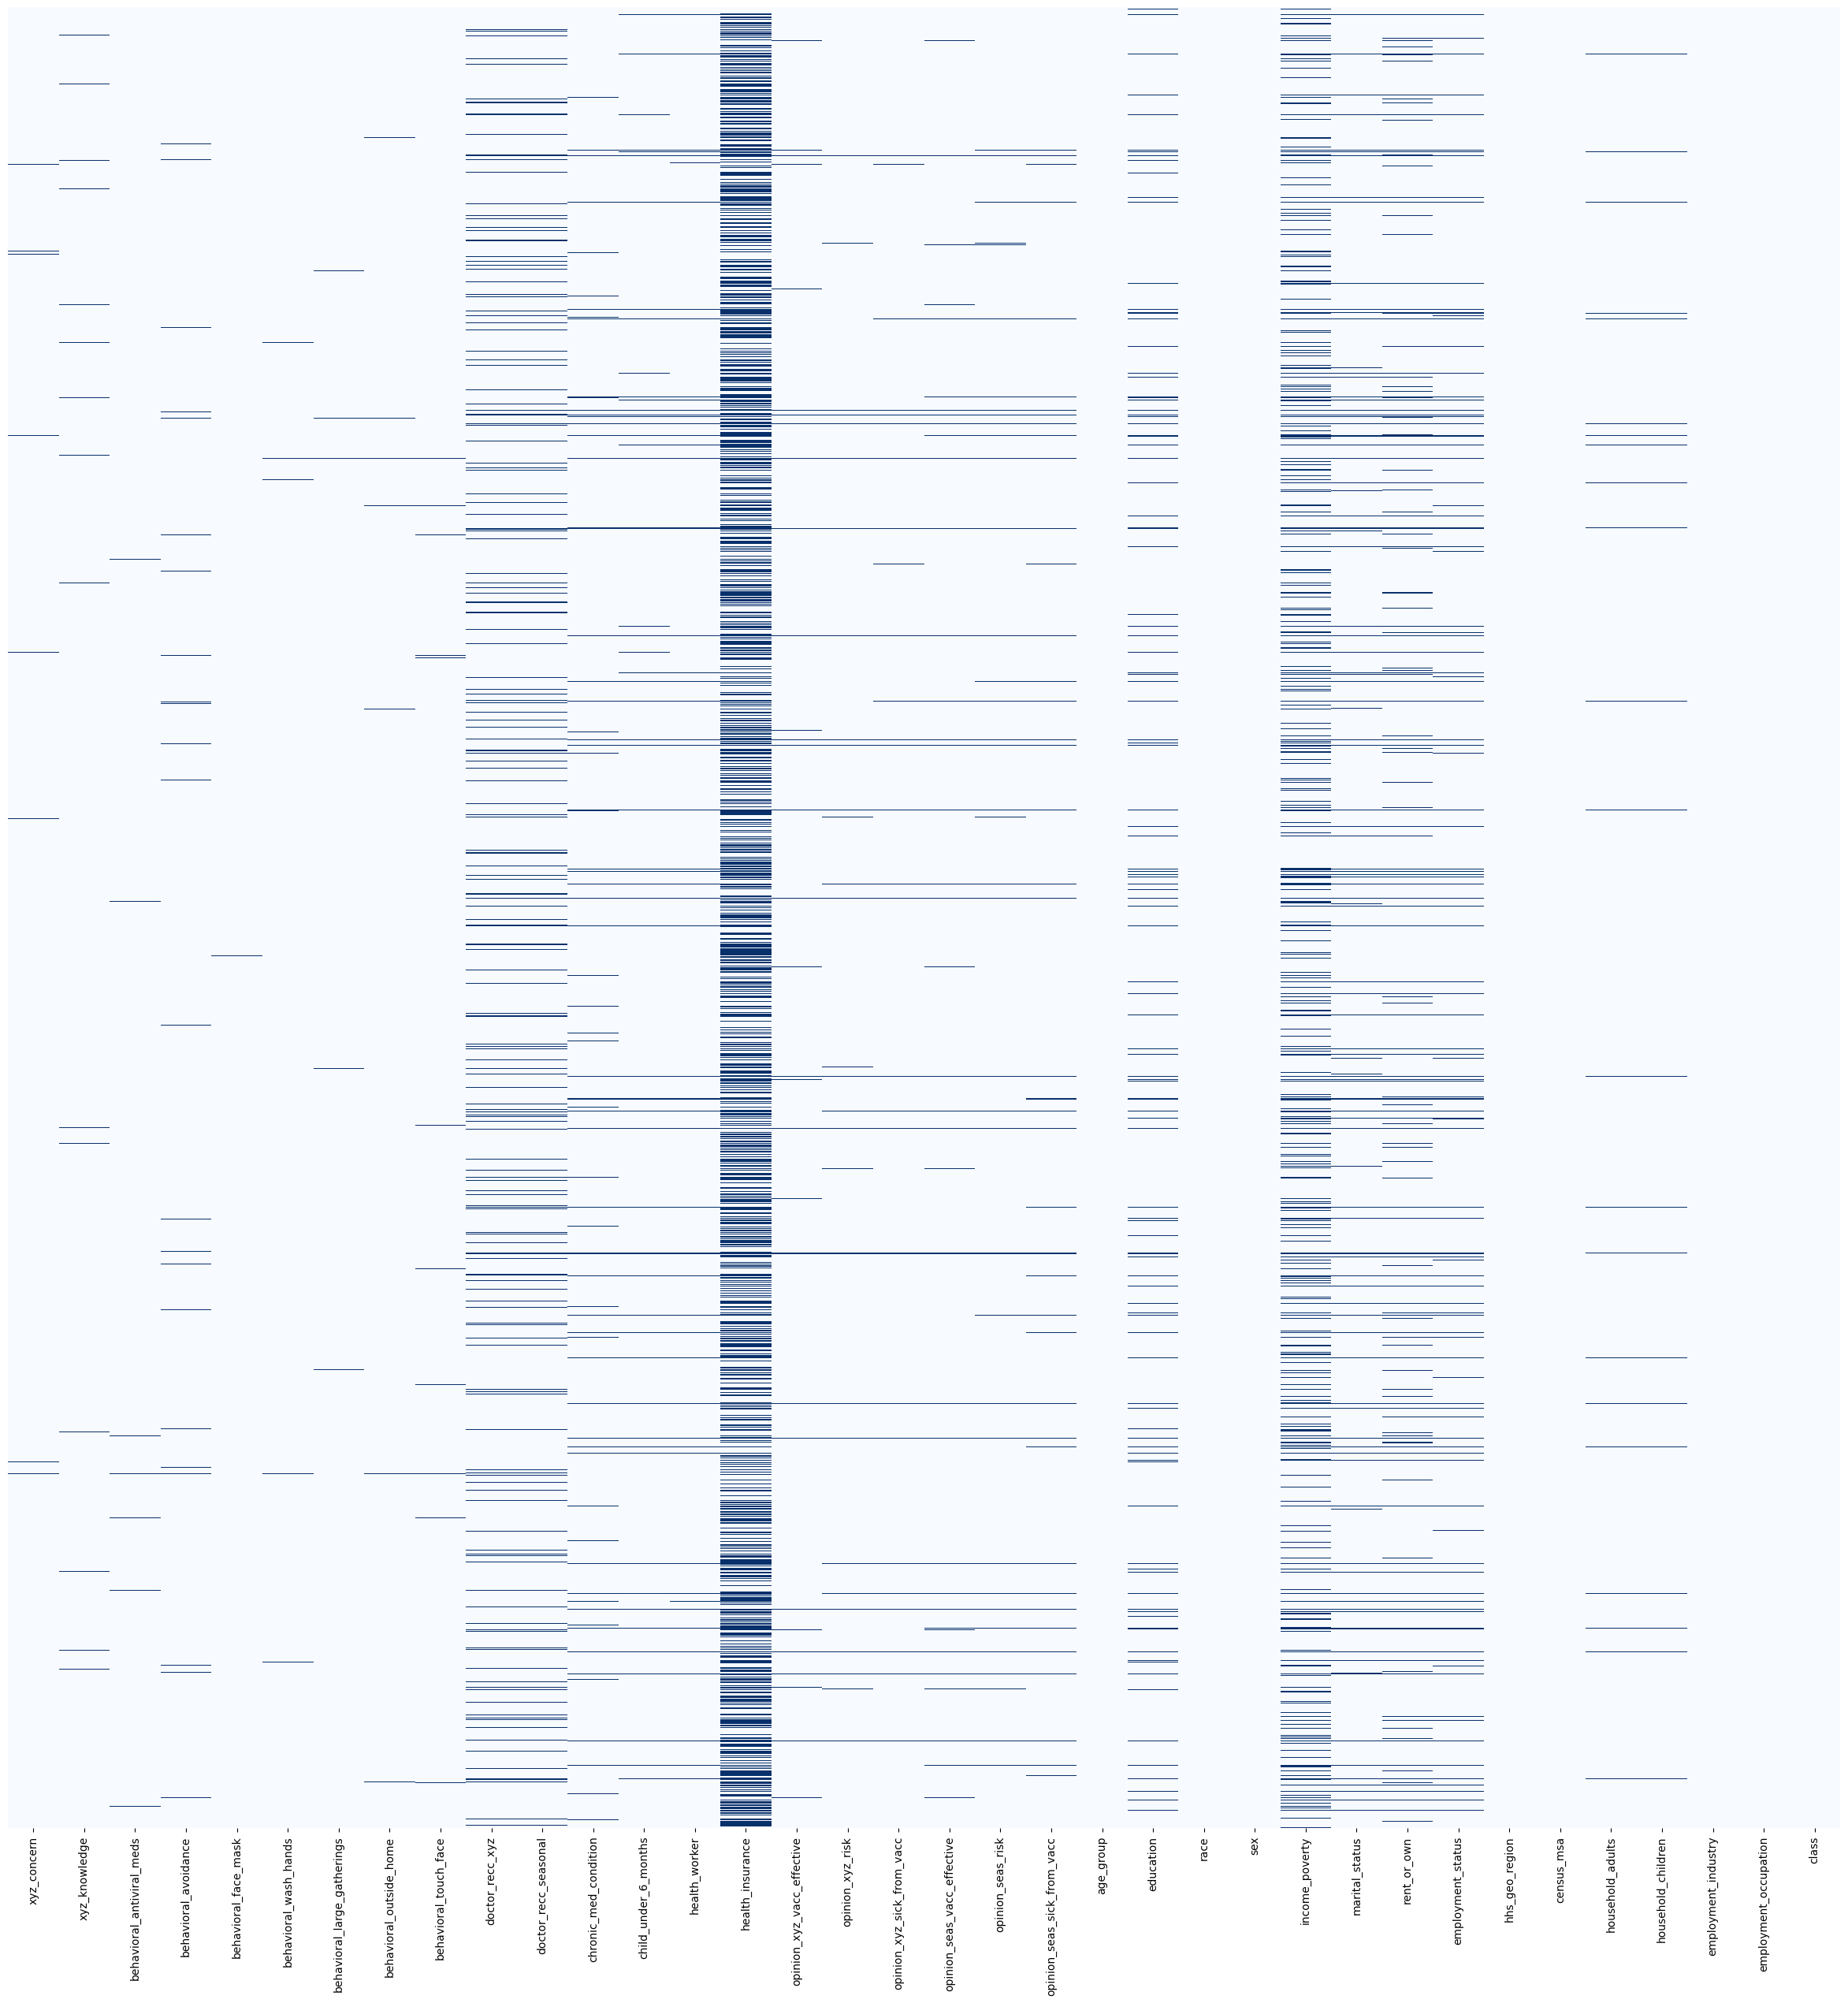

In [405]:
plt.figure(figsize=(30,30))
sns.heatmap(df_xyz.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df_xyz.columns);

In [406]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [407]:
df_xyz['xyz_concern'].fillna(0,inplace=True)
df_seasonal['xyz_concern'].fillna(0,inplace=True)

df_xyz['xyz_knowledge'].fillna(0,inplace=True)
df_seasonal['xyz_knowledge'].fillna(0,inplace=True)

df_xyz['behavioral_antiviral_meds'].fillna(0,inplace=True)
df_seasonal['behavioral_antiviral_meds'].fillna(0,inplace=True)

df_xyz['behavioral_avoidance'].fillna(0,inplace=True)
df_seasonal['behavioral_avoidance'].fillna(0,inplace=True)

df_xyz['behavioral_face_mask'].fillna(0,inplace=True)
df_seasonal['behavioral_face_mask'].fillna(0,inplace=True)

df_xyz['behavioral_wash_hands'].fillna(0,inplace=True)
df_seasonal['behavioral_wash_hands'].fillna(0,inplace=True)

df_xyz['behavioral_large_gatherings'].fillna(0,inplace=True)
df_seasonal['behavioral_large_gatherings'].fillna(0,inplace=True)

df_xyz['behavioral_outside_home'].fillna(0,inplace=True)
df_seasonal['behavioral_outside_home'].fillna(0,inplace=True)

df_xyz['behavioral_touch_face'].fillna(0,inplace=True)
df_seasonal['behavioral_touch_face'].fillna(0,inplace=True)

df_xyz['doctor_recc_xyz'].fillna(0,inplace=True)
df_seasonal['doctor_recc_xyz'].fillna(0,inplace=True)

df_xyz['doctor_recc_seasonal'].fillna(0,inplace=True)
df_seasonal['doctor_recc_seasonal'].fillna(0,inplace=True)

df_xyz['chronic_med_condition'].fillna(0,inplace=True)
df_seasonal['chronic_med_condition'].fillna(0,inplace=True)

df_xyz['child_under_6_months'].fillna(0,inplace=True)
df_seasonal['child_under_6_months'].fillna(0,inplace=True)

df_xyz['health_worker'].fillna(0,inplace=True)
df_seasonal['health_worker'].fillna(0,inplace=True)

df_xyz['health_insurance'].fillna(0,inplace=True)
df_seasonal['health_insurance'].fillna(0,inplace=True)

df_xyz['opinion_xyz_vacc_effective'].fillna(3,inplace=True)
df_seasonal['opinion_xyz_vacc_effective'].fillna(3,inplace=True)

df_xyz['opinion_xyz_risk'].fillna(3,inplace=True)
df_seasonal['opinion_xyz_risk'].fillna(3,inplace=True)

df_xyz['opinion_xyz_sick_from_vacc'].fillna(3,inplace=True)
df_seasonal['opinion_xyz_sick_from_vacc'].fillna(3,inplace=True)

df_xyz['opinion_seas_vacc_effective'].fillna(3,inplace=True)
df_seasonal['opinion_seas_vacc_effective'].fillna(3,inplace=True)

df_xyz['opinion_seas_risk'].fillna(3,inplace=True)
df_seasonal['opinion_seas_risk'].fillna(3,inplace=True)

df_xyz['opinion_seas_sick_from_vacc'].fillna(3,inplace=True)
df_seasonal['opinion_seas_sick_from_vacc'].fillna(3,inplace=True)

df_xyz['education'].fillna(0,inplace=True)
df_seasonal['education'].fillna(0,inplace=True)

df_xyz['income_poverty'].fillna(0,inplace=True)
df_seasonal['income_poverty'].fillna(0,inplace=True)

df_xyz['marital_status'].fillna(0,inplace=True)
df_seasonal['marital_status'].fillna(0,inplace=True)

df_xyz['rent_or_own'].fillna(0,inplace=True)
df_seasonal['rent_or_own'].fillna(0,inplace=True)

df_xyz['employment_status'].fillna(0,inplace=True)
df_seasonal['employment_status'].fillna(0,inplace=True)

df_xyz['household_adults'].fillna(0,inplace=True)
df_seasonal['household_adults'].fillna(0,inplace=True)

df_xyz['household_children'].fillna(0,inplace=True)
df_seasonal['household_children'].fillna(0,inplace=True)

In [408]:
for i in np.arange(0,len(df_xyz.columns),1):
    print("\n")
    print(df_seasonal.columns[i])
    print(df_seasonal[df_seasonal.columns[i]].unique())



xyz_concern
[1.0, 3.0, 2.0, 0.0]
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]


xyz_knowledge
[0.0, 2.0, 1.0]
Categories (3, float64): [0.0, 1.0, 2.0]


behavioral_antiviral_meds
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_avoidance
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_face_mask
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_wash_hands
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_large_gatherings
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_outside_home
[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]


behavioral_touch_face
[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]


doctor_recc_xyz
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


doctor_recc_seasonal
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


chronic_med_condition
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


child_under_6_months
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


health_worker
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


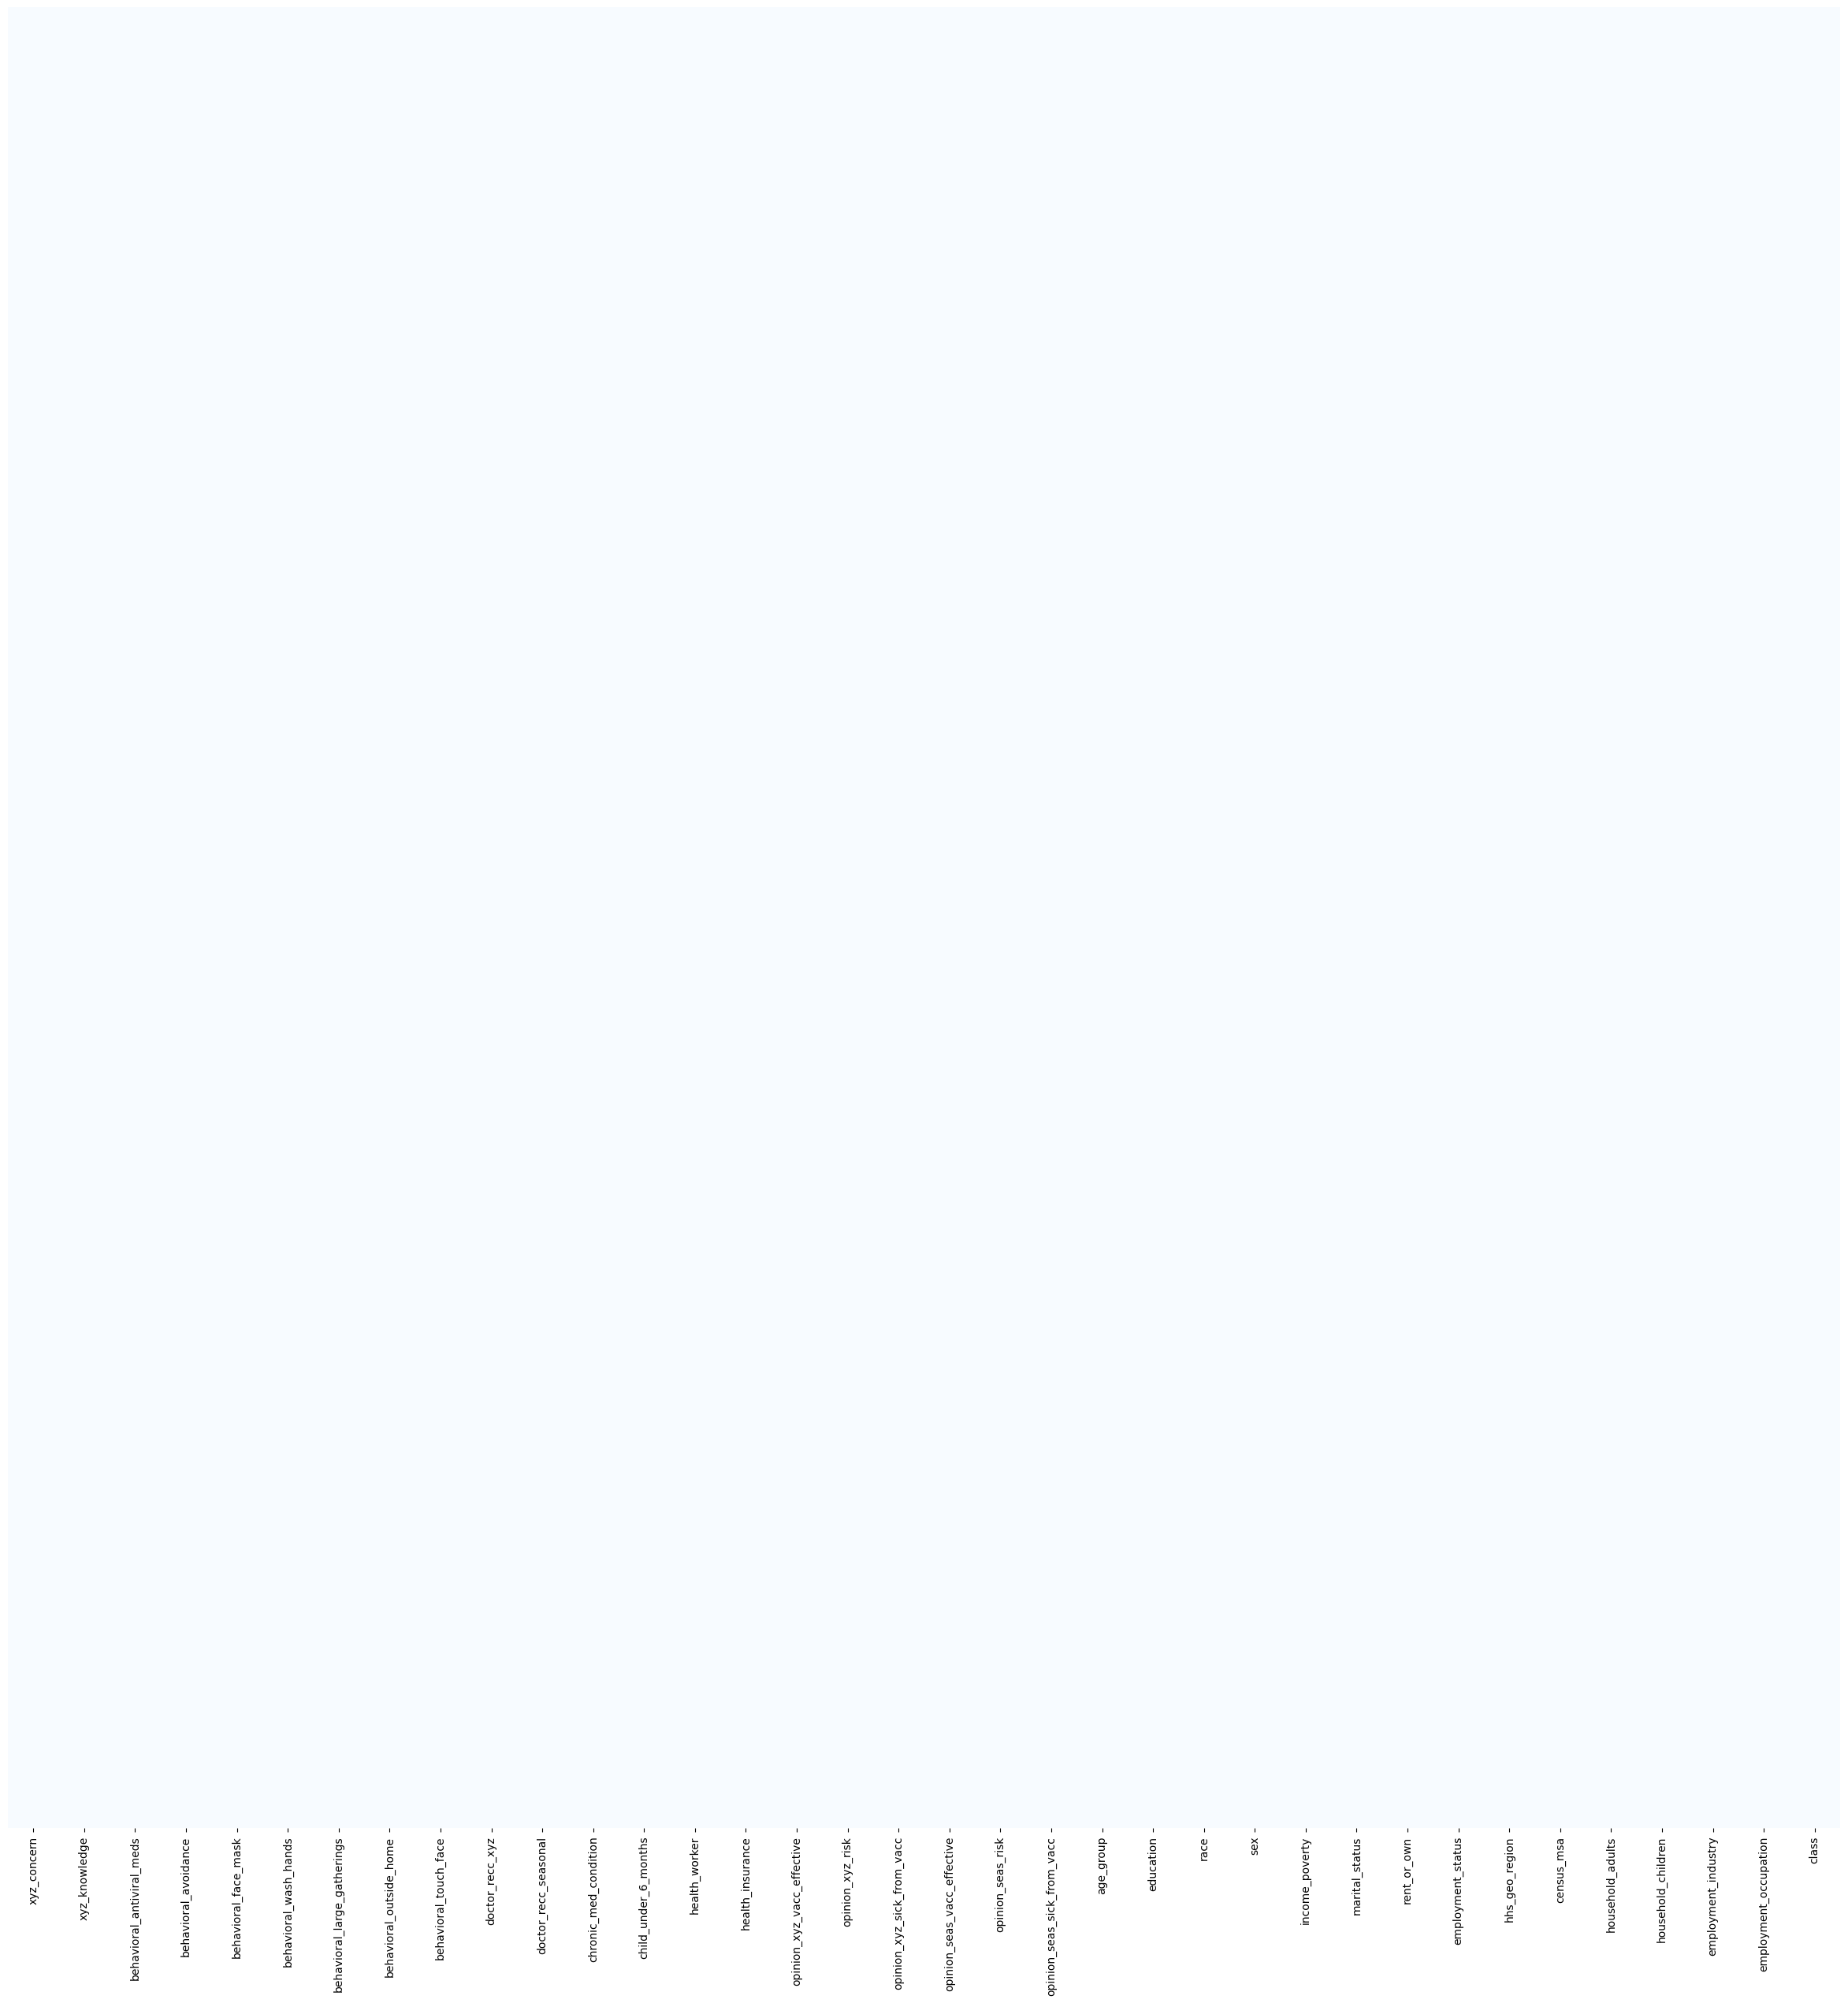

In [409]:
plt.figure(figsize=(30,30))
sns.heatmap(df_xyz.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df_xyz.columns);

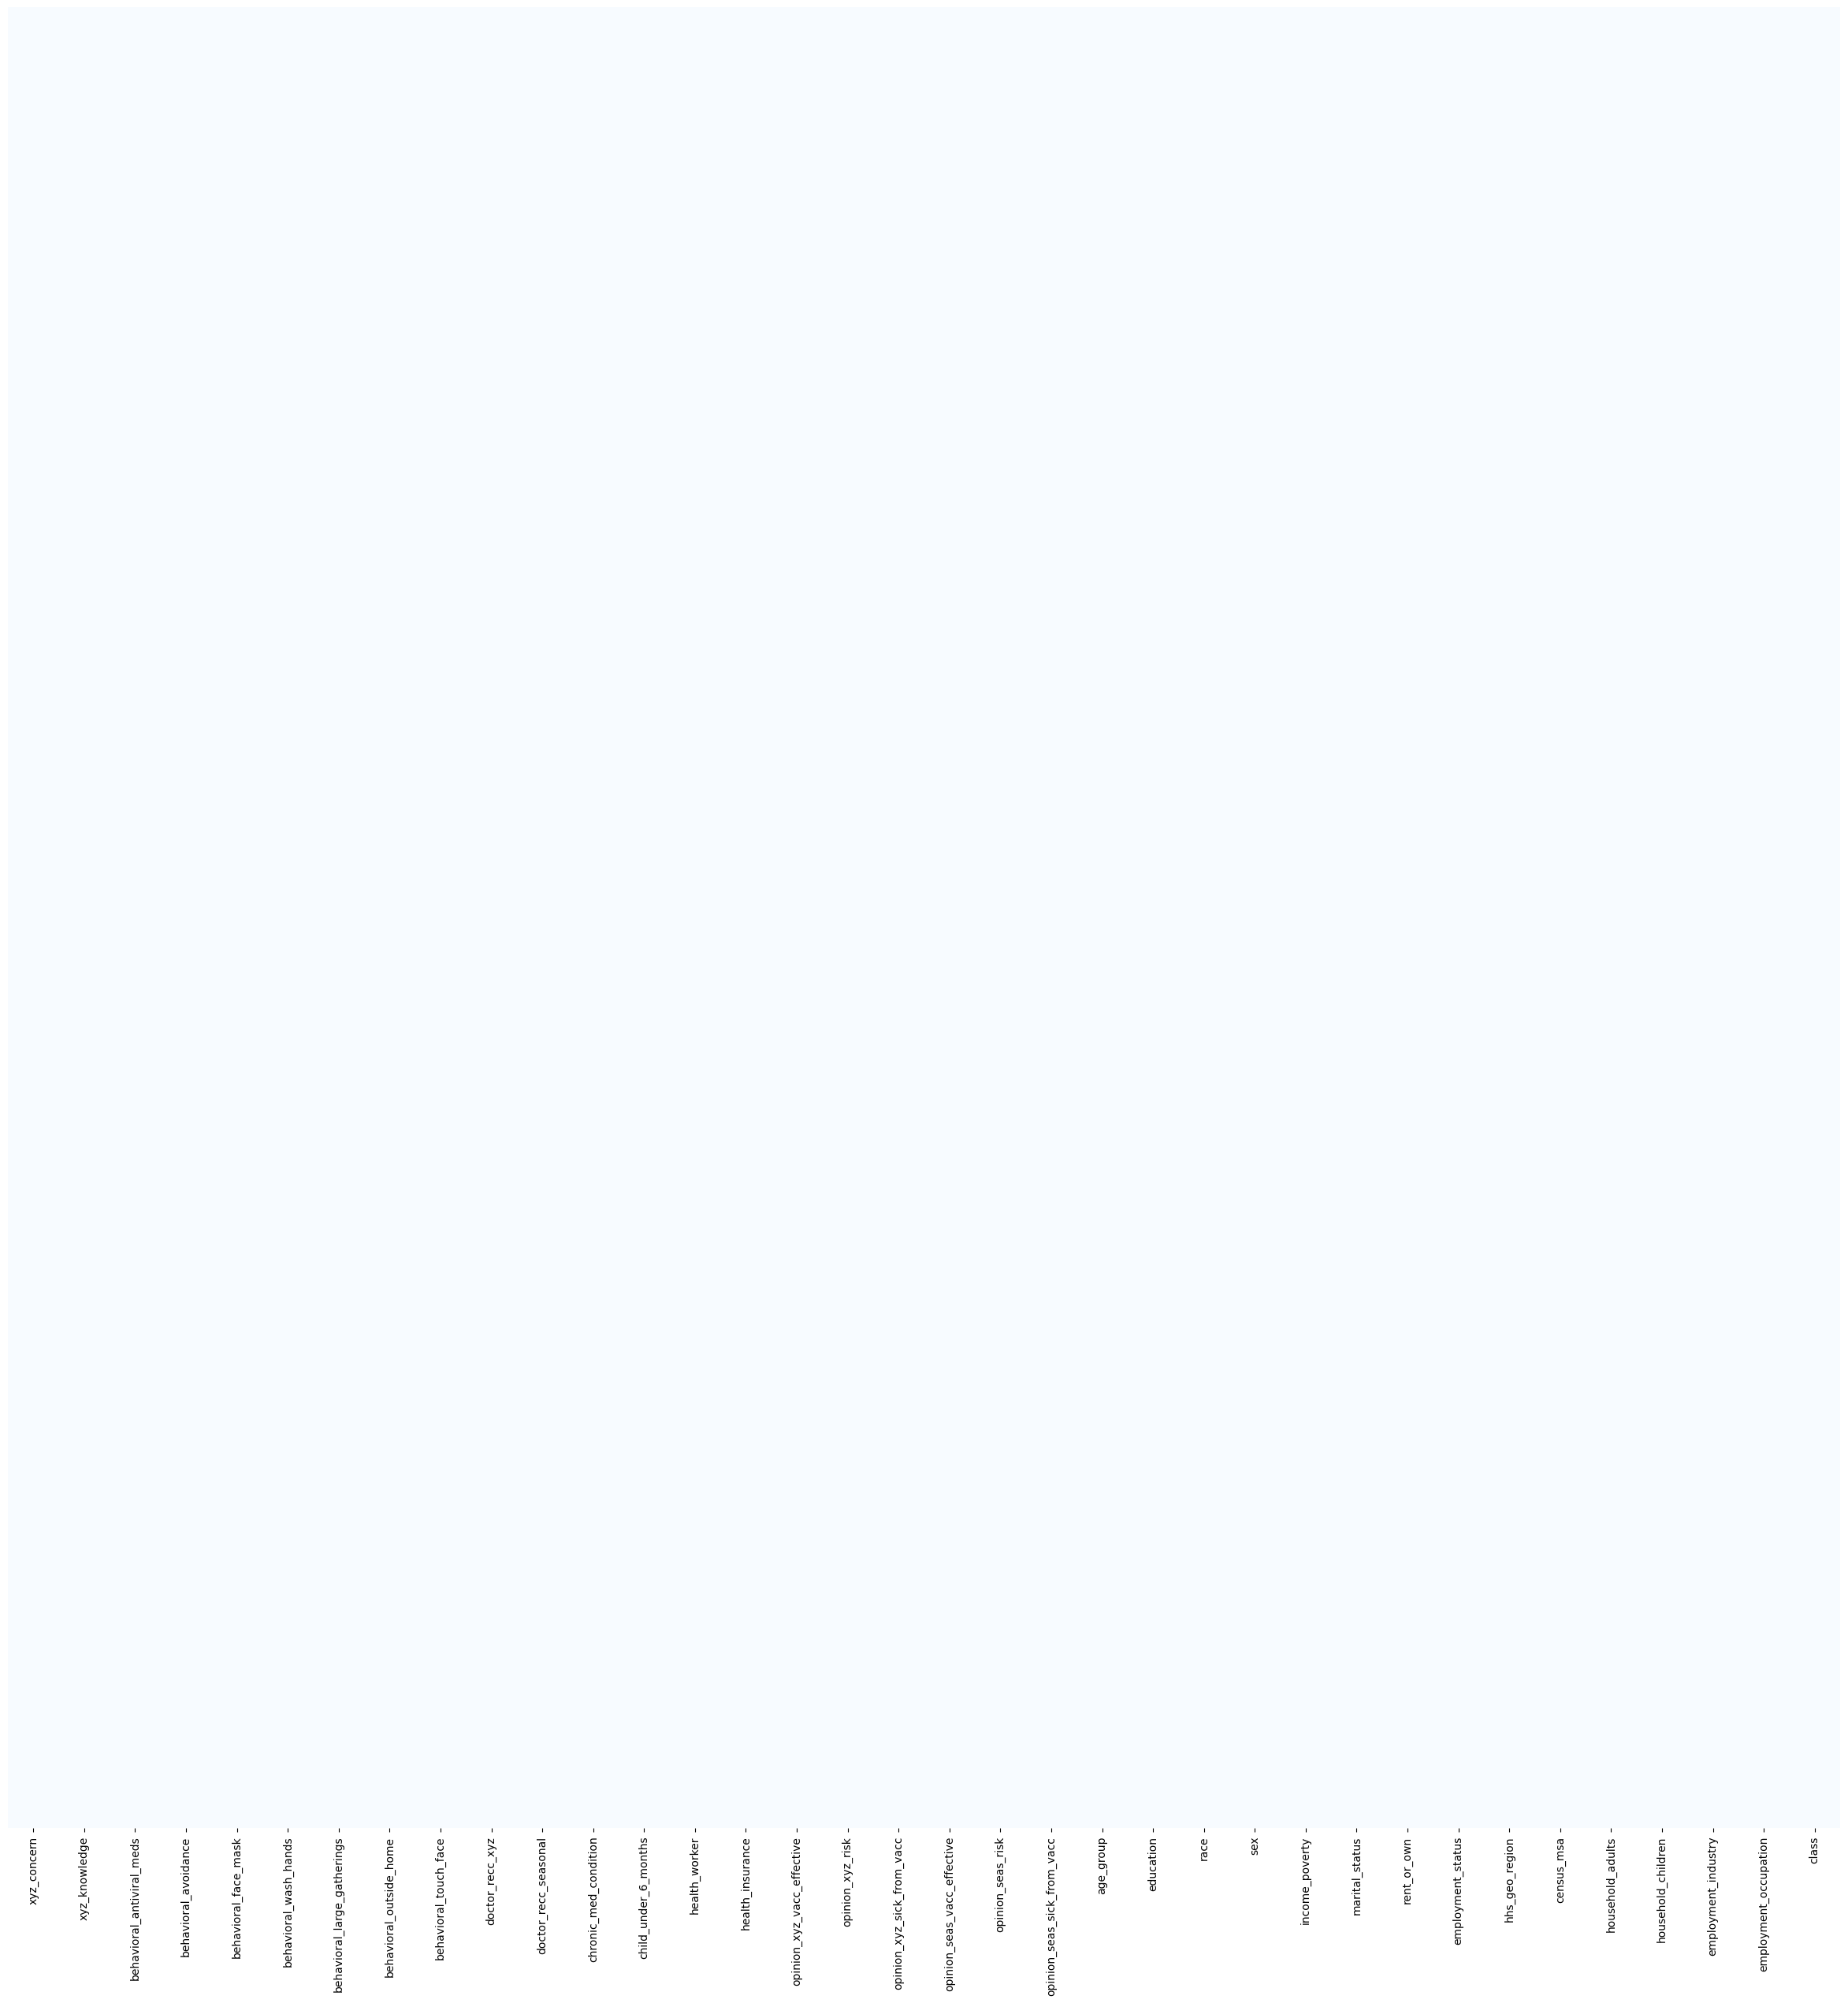

In [410]:
plt.figure(figsize=(30,30))
sns.heatmap(df_seasonal.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df_seasonal.columns);

In [411]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [412]:
corr_features = correlation(df_xyz, 0.7)
len(set(corr_features))

1

In [413]:
df_xyz.drop(corr_features,axis=1,inplace=True)

In [414]:
corr_features = correlation(df_seasonal, 0.7)
len(set(corr_features))

1

In [415]:
df_seasonal.drop(corr_features,axis=1,inplace=True)

In [416]:
df_xyz.corr().iloc[:,-1].sort_values(ascending=False)

class                          1.000000
doctor_recc_xyz                0.394086
opinion_xyz_risk               0.320393
opinion_xyz_vacc_effective     0.266654
opinion_seas_risk              0.255955
health_insurance               0.244975
doctor_recc_seasonal           0.218976
opinion_seas_vacc_effective    0.176963
health_worker                  0.168056
xyz_concern                    0.121664
xyz_knowledge                  0.117153
chronic_med_condition          0.094360
behavioral_wash_hands          0.074768
opinion_xyz_sick_from_vacc     0.074299
behavioral_touch_face          0.072377
behavioral_face_mask           0.070413
child_under_6_months           0.066712
income_poverty                 0.055378
marital_status                 0.052767
behavioral_avoidance           0.048712
age_group                      0.041074
behavioral_antiviral_meds      0.040226
education                      0.038475
employment_status              0.025636
behavioral_outside_home        0.022080


<Axes: >

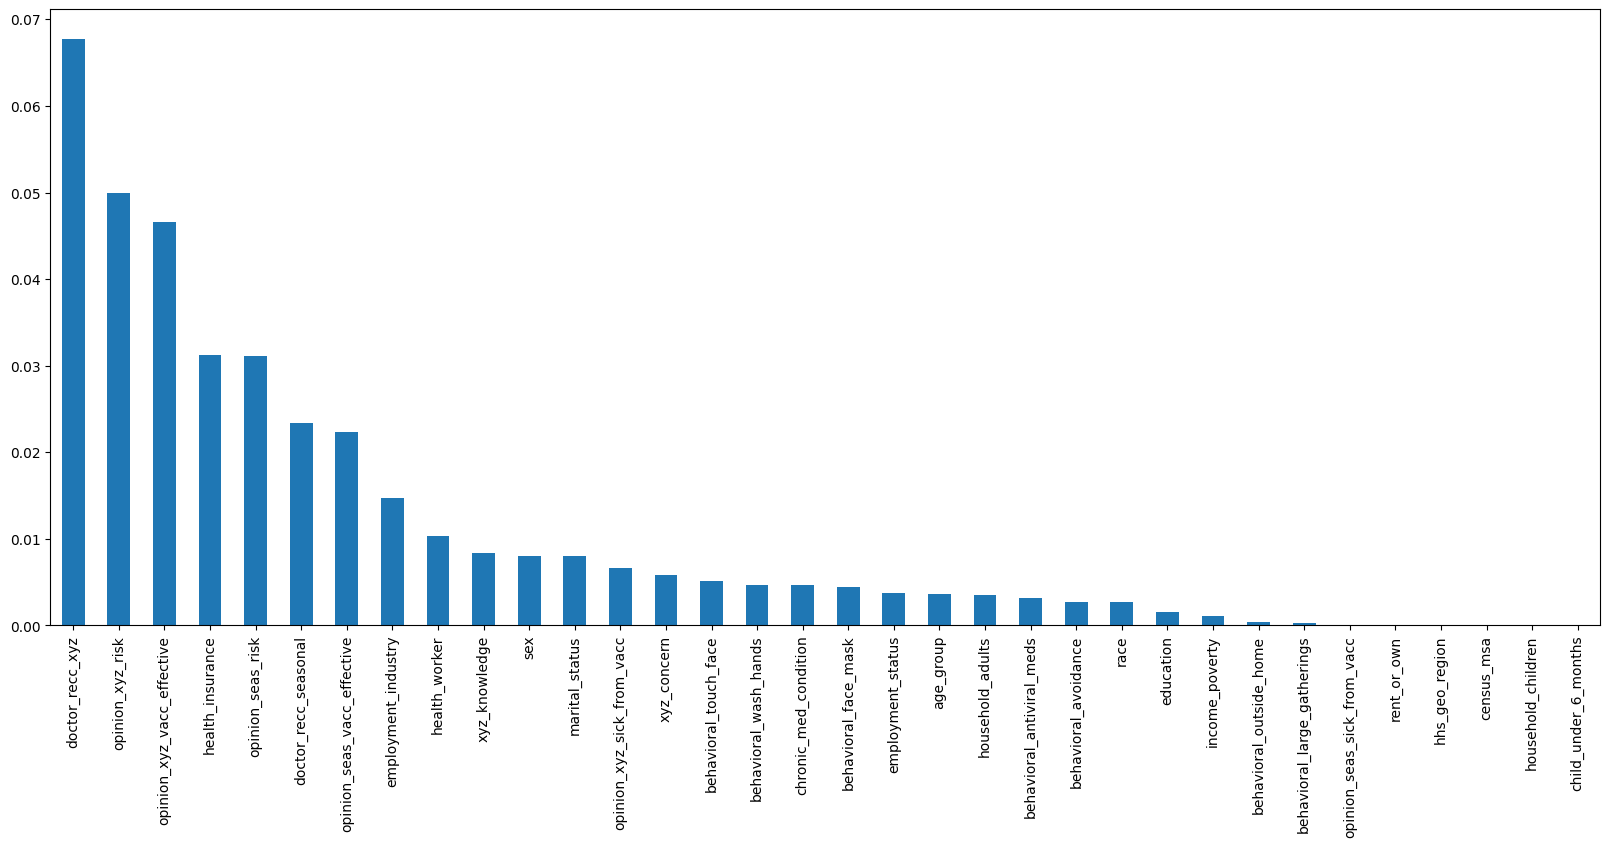

In [417]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info_xyz = mutual_info_classif(df_xyz.iloc[:,:-1], df_xyz.iloc[:,-1])

mutual_info_xyz = pd.Series(mutual_info_xyz)
mutual_info_xyz.index = df_xyz.iloc[:,:-1].columns
mutual_info_xyz.sort_values(ascending=False)

#let's plot the ordered mutual_info values per feature
mutual_info_xyz.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [418]:
mutual_info_xyz.sort_values(ascending=False)

doctor_recc_xyz                0.067764
opinion_xyz_risk               0.049903
opinion_xyz_vacc_effective     0.046583
health_insurance               0.031191
opinion_seas_risk              0.031086
doctor_recc_seasonal           0.023371
opinion_seas_vacc_effective    0.022339
employment_industry            0.014740
health_worker                  0.010341
xyz_knowledge                  0.008379
sex                            0.008027
marital_status                 0.007990
opinion_xyz_sick_from_vacc     0.006626
xyz_concern                    0.005868
behavioral_touch_face          0.005169
behavioral_wash_hands          0.004671
chronic_med_condition          0.004652
behavioral_face_mask           0.004439
employment_status              0.003773
age_group                      0.003665
household_adults               0.003526
behavioral_antiviral_meds      0.003190
behavioral_avoidance           0.002700
race                           0.002655
education                      0.001566


In [419]:
df_seasonal.corr().iloc[:,-1].sort_values(ascending=False)

class                          1.000000
opinion_seas_risk              0.385668
doctor_recc_seasonal           0.360696
opinion_seas_vacc_effective    0.358770
age_group                      0.277454
opinion_xyz_risk               0.213377
opinion_xyz_vacc_effective     0.204710
doctor_recc_xyz                0.198560
chronic_med_condition          0.169465
xyz_concern                    0.153838
employment_status              0.150615
health_insurance               0.138161
health_worker                  0.126977
behavioral_touch_face          0.119078
xyz_knowledge                  0.118515
behavioral_wash_hands          0.112164
employment_industry            0.092303
sex                            0.077091
behavioral_avoidance           0.074942
behavioral_large_gatherings    0.063722
income_poverty                 0.058871
marital_status                 0.058209
behavioral_outside_home        0.053287
behavioral_face_mask           0.050020
education                      0.040405


<Axes: >

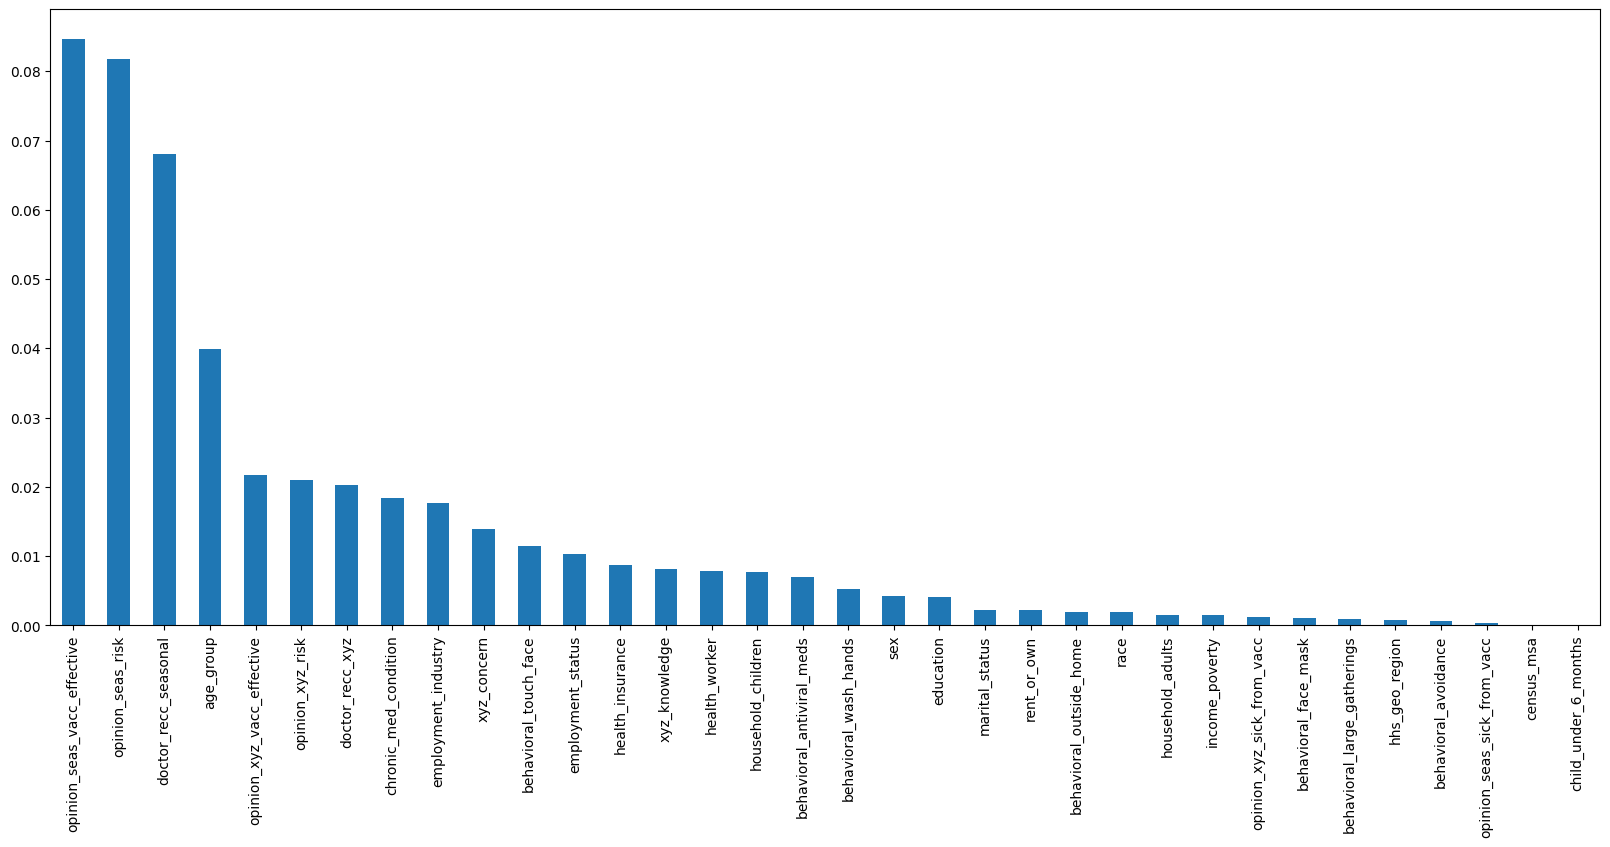

In [420]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info_seasonal = mutual_info_classif(df_seasonal.iloc[:,:-1], df_seasonal.iloc[:,-1])

mutual_info_seasonal = pd.Series(mutual_info_seasonal)
mutual_info_seasonal.index = df_seasonal.iloc[:,:-1].columns
mutual_info_seasonal.sort_values(ascending=False)

#let's plot the ordered mutual_info values per feature
mutual_info_seasonal.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [421]:
mutual_info_seasonal.sort_values(ascending=False)

opinion_seas_vacc_effective    0.084700
opinion_seas_risk              0.081786
doctor_recc_seasonal           0.068070
age_group                      0.039860
opinion_xyz_vacc_effective     0.021659
opinion_xyz_risk               0.020973
doctor_recc_xyz                0.020322
chronic_med_condition          0.018398
employment_industry            0.017734
xyz_concern                    0.013865
behavioral_touch_face          0.011514
employment_status              0.010291
health_insurance               0.008666
xyz_knowledge                  0.008149
health_worker                  0.007861
household_children             0.007682
behavioral_antiviral_meds      0.006942
behavioral_wash_hands          0.005244
sex                            0.004201
education                      0.004093
marital_status                 0.002254
rent_or_own                    0.002246
behavioral_outside_home        0.001957
race                           0.001865
household_adults               0.001530


In [422]:
for i in np.arange(1,len(df_xyz.columns),1):
    print("\n")
    print(df_xyz.columns[i])
    print(df_xyz[df_xyz.columns[i]].unique())



xyz_knowledge
[0.0, 2.0, 1.0]
Categories (3, float64): [0.0, 1.0, 2.0]


behavioral_antiviral_meds
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_avoidance
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_face_mask
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_wash_hands
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_large_gatherings
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


behavioral_outside_home
[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]


behavioral_touch_face
[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]


doctor_recc_xyz
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


doctor_recc_seasonal
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


chronic_med_condition
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


child_under_6_months
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


health_worker
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


health_insurance
[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]


opinion_xyz_v

In [423]:
xyz_cols = ['doctor_recc_xyz','opinion_xyz_risk','opinion_xyz_vacc_effective','opinion_seas_risk',
            'health_insurance','doctor_recc_seasonal','opinion_seas_vacc_effective',
            'health_worker','xyz_concern','xyz_knowledge','chronic_med_condition',
            'behavioral_wash_hands','marital_status','behavioral_avoidance',
            'opinion_xyz_sick_from_vacc','behavioral_face_mask','behavioral_touch_face',
            'employment_industry','behavioral_outside_home','sex','class']

seasonal_cols = ['opinion_seas_risk','opinion_seas_vacc_effective','doctor_recc_seasonal','age_group',                     
                'opinion_xyz_risk','opinion_xyz_vacc_effective','doctor_recc_xyz','chronic_med_condition',
                'employment_status','health_insurance','employment_industry','xyz_knowledge','health_worker',
                'xyz_concern','behavioral_touch_face','behavioral_wash_hands','behavioral_avoidance','sex',
                'marital_status','household_adults','class']

In [424]:
len(xyz_cols), len(seasonal_cols)

(21, 21)

In [425]:
df_xyz=df_xyz[xyz_cols]
df_seasonal=df_seasonal[seasonal_cols]

In [426]:
from imblearn.combine import SMOTETomek

In [427]:
smk = SMOTETomek()

In [428]:
from collections import Counter
print(f'Original Dataset Shape: {Counter(df_xyz.iloc[:,-1])}')

Original Dataset Shape: Counter({0: 21033, 1: 5674})


In [429]:
xyz_X=df_xyz.iloc[:,:-1]
xyz_y=df_xyz.iloc[:,-1]

In [430]:
xyz_X, xyz_y = smk.fit_resample(xyz_X, xyz_y)

In [431]:
print(f'Modified Dataset Shape: {Counter(xyz_y)}')

Modified Dataset Shape: Counter({0: 20991, 1: 20991})


In [432]:
from sklearn.model_selection import train_test_split

xyz_X_train, xyz_X_test, xyz_y_train, xyz_y_test = train_test_split(xyz_X,xyz_y,test_size=0.3,random_state=42)
seas_X_train, seas_X_test, seas_y_train, seas_y_test = train_test_split(df_seasonal.iloc[:,:-1],df_seasonal.iloc[:,-1],test_size=0.3,random_state=42)

In [433]:
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier()
clf2=RandomForestClassifier()

clf1.fit(xyz_X_train,xyz_y_train)
clf2.fit(seas_X_train,seas_y_train)

xyz_y_pred = clf1.predict_proba(xyz_X_test)
seas_y_pred = clf2.predict_proba(seas_X_test)

In [434]:
from sklearn.metrics import roc_auc_score
score = ( roc_auc_score(xyz_y_test,xyz_y_pred[:,1]) + roc_auc_score(seas_y_test,seas_y_pred[:,1]) )/2

score

0.8960357189432839

In [435]:
test_df = pd.read_csv('test_set_features.csv')
test_df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [436]:
Index = test_df.iloc[:,0]
test_df=test_df.drop('respondent_id',axis=1)
test_df.shape

(26708, 35)

In [437]:
a=test_df.isnull().sum()
z=a.values.astype('float')

z=(z/26707.0)*100.0

s=pd.Series(z,a.index)
print("Percentage Null Values: ")
s

Percentage Null Values: 


xyz_concern                     0.318269
xyz_knowledge                   0.456809
behavioral_antiviral_meds       0.295803
behavioral_avoidance            0.797544
behavioral_face_mask            0.071142
behavioral_wash_hands           0.149773
behavioral_large_gatherings     0.269592
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.489722
child_under_6_months            3.044146
health_worker                   2.954282
health_insurance               45.785749
opinion_xyz_vacc_effective      1.490246
opinion_xyz_risk                1.422848
opinion_xyz_sick_from_vacc      1.404126
opinion_seas_vacc_effective     1.692440
opinion_seas_risk               1.868424
opinion_seas_sick_from_vacc     1.950799
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [438]:
test_df['age_group'].unique()

array(['35 - 44 Years', '18 - 34 Years', '55 - 64 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [439]:
age_map = dict(
    {
        '55 - 64 Years' : 3.0 ,
        '35 - 44 Years' : 1.0 ,
        '18 - 34 Years' : 0.0 ,
        '65+ Years' : 4.0 ,
        '45 - 54 Years' : 2.0
    }
)
test_df['age_group']=test_df['age_group'].map(age_map, na_action='ignore')


education_map = dict(
    {
        '< 12 Years' : 0.0 ,
        '12 Years' : 1.0 ,
        'College Graduate' : 2.0 ,
        'Some College' : 3.0
    }
)
test_df['education']=test_df['education'].map(education_map, na_action='ignore')


race_map = dict(
    {
        'White' : 'a' ,
        'Black' : 'b' ,
        'Other or Multiple' : 'c' ,
        'Hispanic' : 'd'
    }
)
test_df['race']=test_df['race'].map(race_map, na_action='ignore')
test_df['race'] = test_df['race'].astype('category')


sex_map = dict(
    {
        'Male' : 0.0 ,
        'Female' : 1.0
    }
)
test_df['sex']=test_df['sex'].map(sex_map,na_action='ignore')


income_map = dict(
    {
        'Below Poverty' : 0.0 , 
        '<= $75,000, Above Poverty' : 1.0 ,
        '> $75,000' : 2.0
    }
)
test_df['income_poverty'] = test_df['income_poverty'].map(income_map, na_action='ignore')


marital_map = dict(
    {
        'Not Married' : 0.0 ,
        'Married' : 1.0
    }
)
test_df['marital_status'] = test_df['marital_status'].map(marital_map, na_action='ignore')


rent_map=dict(
    {
        'Own' : 0.0 ,
        'Rent' : 1.0
    }
)
test_df['rent_or_own'] = test_df['rent_or_own'].map(rent_map, na_action='ignore')


employment_map = dict(
    {
        'Not in Labor Force' : 2.0 ,
        'Employed' : 1.0 ,
        'Unemployed' : 0.0
    }
)
test_df['employment_status'] = test_df['employment_status'].map(employment_map, na_action='ignore')


region_map = dict(
    {
        'oxchjgsf' : 'a' , 
        'bhuqouqj' : 'b' ,
        'qufhixun' : 'c' ,
        'lrircsnp' : 'd' ,
        'atmpeygn' : 'e' ,
        'lzgpxyit' : 'f' ,
        'fpwskwrf' : 'g' ,
        'mlyzmhmf' : 'h' ,
        'dqpwygqj' : 'i' ,
        'kbazzjca' : 'j'
    }
)
test_df['hhs_geo_region'] = test_df['hhs_geo_region'].map(region_map,na_action='ignore')
test_df['hhs_geo_region'] = test_df['hhs_geo_region'].astype('category')


census_map = dict(
    {
        'Non-MSA' : 0.0,
        'MSA, Not Principle  City' : 1.0 ,
        'MSA, Principle City' : 2.0
    }
)
test_df['census_msa']=test_df['census_msa'].map(census_map,na_action='ignore')


industry_map = dict(
    {
        'pxcmvdjn' :'a',
        'rucpziij' :'b',
        'wxleyezf' :'c',
        'saaquncn' :'d',
        'xicduogh' :'e',
        'ldnlellj' :'f',
        'wlfvacwt' :'g',
        'nduyfdeo' :'h',
        'fcxhlnwr' :'i',
        'vjjrobsf' :'j',
        'arjwrbjb' :'k',
        'atmlpfrs' :'l',
        'msuufmds' :'m',
        'xqicxuve' :'n',
        'phxvnwax' :'o',
        'dotnnunm' :'p',
        'mfikgejo' :'q',
        'cfqqtusy' :'r',
        'mcubkhph' :'s',
        'haxffmxo' :'t',
        'qnlwzans' :'u'
    }
)
test_df['employment_industry']=test_df['employment_industry'].map(industry_map,na_action='ignore')
test_df['employment_industry'] = test_df['employment_industry'].astype('category')


occupation_map = dict(
    {
        'xgwztkwe' : 'a' ,
        'xtkaffoo' : 'b' ,
        'emcorrxb' : 'c' ,
        'vlluhbov' : 'd' ,
        'xqwwgdyp' : 'e' ,
        'ccgxvspp' : 'f' ,
        'qxajmpny' : 'g' ,
        'kldqjyjy' : 'h' ,
        'mxkfnird' : 'i' ,
        'hfxkjkmi' : 'j' ,
        'bxpfxfdn' : 'k' ,
        'ukymxvdu' : 'l' ,
        'cmhcxjea' : 'm' ,
        'haliazsg' : 'n' ,
        'dlvbwzss' : 'o' ,
        'xzmlyyjv' : 'p' ,
        'oijqvulv' : 'q' ,
        'rcertsgn' : 'r' ,
        'tfqavkke' : 's' ,
        'hodpvpew' : 't' ,
        'uqqtjvyb' : 'u' ,
        'pvmttkik' : 'v' ,
        'dcjcmpih' : 'w'
    }
)
test_df['employment_occupation'] = test_df['employment_occupation'].map(occupation_map,na_action='ignore')
test_df['employment_occupation'] = test_df['employment_occupation'].astype('category')

In [440]:
for i in range(len(test_df.columns)):
    print(test_df[test_df.columns[i]].value_counts())
    print("\n")

xyz_concern
2.0    10743
1.0     8158
3.0     4523
0.0     3199
Name: count, dtype: int64


xyz_knowledge
1.0    14629
2.0     9515
0.0     2442
Name: count, dtype: int64


behavioral_antiviral_meds
0.0    25307
1.0     1322
Name: count, dtype: int64


behavioral_avoidance
1.0    19336
0.0     7159
Name: count, dtype: int64


behavioral_face_mask
0.0    24840
1.0     1849
Name: count, dtype: int64


behavioral_wash_hands
1.0    22030
0.0     4638
Name: count, dtype: int64


behavioral_large_gatherings
0.0    17273
1.0     9363
Name: count, dtype: int64


behavioral_outside_home
0.0    17647
1.0     8979
Name: count, dtype: int64


behavioral_touch_face
1.0    18174
0.0     8406
Name: count, dtype: int64


doctor_recc_xyz
0.0    19082
1.0     5466
Name: count, dtype: int64


doctor_recc_seasonal
0.0    16360
1.0     8188
Name: count, dtype: int64


chronic_med_condition
0.0    18532
1.0     7244
Name: count, dtype: int64


child_under_6_months
0.0    23660
1.0     2235
Name: count, dtyp

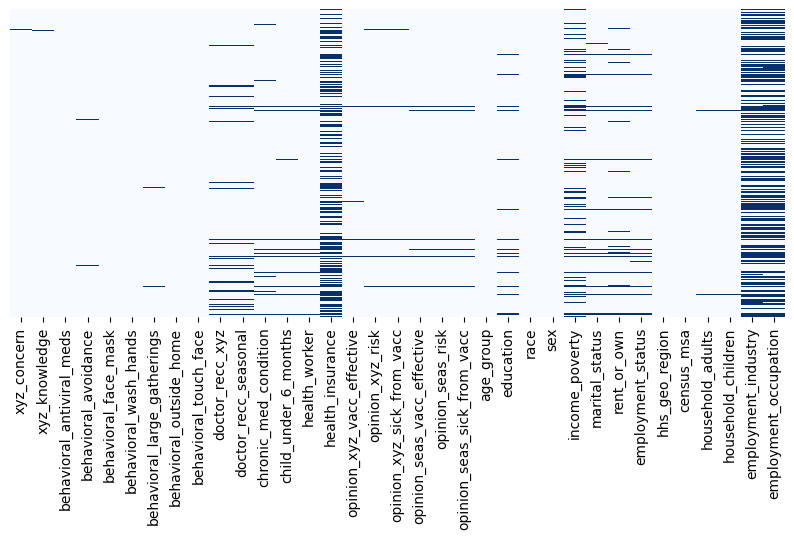

In [441]:
plt.figure(figsize=(10,4))
sns.heatmap(test_df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=test_df.columns);

In [442]:
test_df['race']=le_race.fit_transform(test_df['race'])

test_df['hhs_geo_region']=le_region.fit_transform(test_df['hhs_geo_region'])

test_df['employment_industry']=le_industry.fit_transform(test_df['employment_industry'])

test_df['employment_occupation']=le_occupation.fit_transform(test_df['employment_occupation'])

In [443]:
for i in range(len(df_xyz.columns)):
    df_xyz[df_xyz.columns[i]] = df_xyz[df_xyz.columns[i]].astype('category')
    df_seasonal[df_seasonal.columns[i]] = df_seasonal[df_seasonal.columns[i]].astype('category')

In [444]:
test_df['xyz_concern'].fillna(0,inplace=True)

test_df['xyz_knowledge'].fillna(0,inplace=True)

test_df['behavioral_antiviral_meds'].fillna(0,inplace=True)

test_df['behavioral_avoidance'].fillna(0,inplace=True)

test_df['behavioral_face_mask'].fillna(0,inplace=True)

test_df['behavioral_wash_hands'].fillna(0,inplace=True)

test_df['behavioral_large_gatherings'].fillna(0,inplace=True)

test_df['behavioral_outside_home'].fillna(0,inplace=True)

test_df['behavioral_touch_face'].fillna(0,inplace=True)

test_df['doctor_recc_xyz'].fillna(0,inplace=True)

test_df['doctor_recc_seasonal'].fillna(0,inplace=True)

test_df['chronic_med_condition'].fillna(0,inplace=True)

test_df['child_under_6_months'].fillna(0,inplace=True)

test_df['health_worker'].fillna(0,inplace=True)

test_df['health_insurance'].fillna(0,inplace=True)

test_df['opinion_xyz_vacc_effective'].fillna(3,inplace=True)

test_df['opinion_xyz_risk'].fillna(3,inplace=True)

test_df['opinion_xyz_sick_from_vacc'].fillna(3,inplace=True)

test_df['opinion_seas_vacc_effective'].fillna(3,inplace=True)

test_df['opinion_seas_risk'].fillna(3,inplace=True)

test_df['opinion_seas_sick_from_vacc'].fillna(3,inplace=True)

test_df['education'].fillna(0,inplace=True)

test_df['income_poverty'].fillna(0,inplace=True)

test_df['marital_status'].fillna(0,inplace=True)

test_df['rent_or_own'].fillna(0,inplace=True)

test_df['employment_status'].fillna(0,inplace=True)

test_df['household_adults'].fillna(0,inplace=True)

test_df['household_children'].fillna(0,inplace=True)

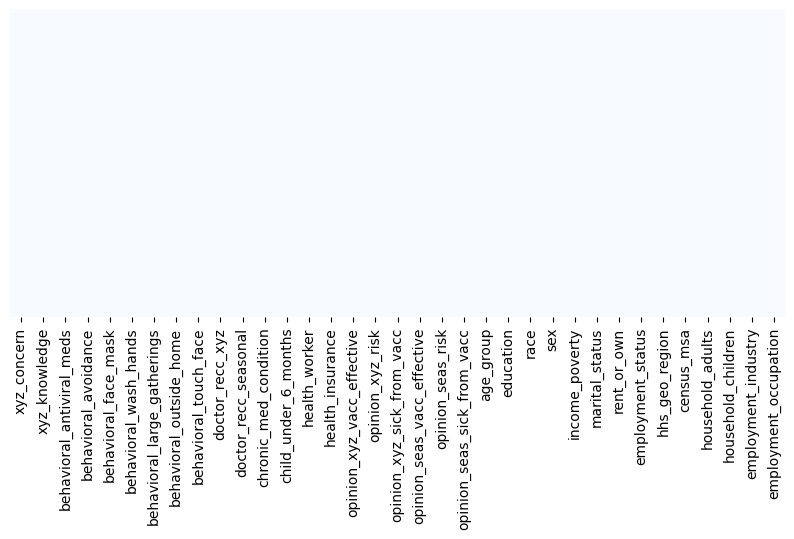

In [445]:
plt.figure(figsize=(10,4))
sns.heatmap(test_df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=test_df.columns);

In [447]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [449]:
corr_features = correlation(test_df,0.7)
corr_features

{'employment_occupation'}

In [450]:
test_df.drop(corr_features,axis=1,inplace=True)

In [451]:
test_df_xyz = test_df.copy()
test_df_seasonal = test_df.copy()

In [452]:
xyz_cols = ['doctor_recc_xyz','opinion_xyz_risk','opinion_xyz_vacc_effective','opinion_seas_risk','health_insurance','doctor_recc_seasonal','opinion_seas_vacc_effective',
'health_worker','xyz_concern','xyz_knowledge','chronic_med_condition','behavioral_wash_hands','marital_status','behavioral_avoidance',
'opinion_xyz_sick_from_vacc','behavioral_face_mask','behavioral_touch_face','employment_industry','behavioral_outside_home','sex'  ]
seasonal_cols = ['opinion_seas_risk','opinion_seas_vacc_effective','doctor_recc_seasonal','age_group',                     
'opinion_xyz_risk','opinion_xyz_vacc_effective','doctor_recc_xyz','chronic_med_condition',
'employment_status','health_insurance','employment_industry','xyz_knowledge','health_worker',
'xyz_concern','behavioral_touch_face','behavioral_wash_hands','behavioral_avoidance','sex',
'marital_status','household_adults' ]

In [453]:
test_df_xyz = test_df_xyz[xyz_cols]
test_df_seasonal = test_df_seasonal[seasonal_cols]

In [454]:
test_xyz_y_pred = clf1.predict_proba(test_df_xyz)
test_seas_y_pred = clf2.predict_proba(test_df_seasonal)

In [455]:
result = pd.DataFrame(
    {
        'respondent_id': Index,
        'xyz_vaccine' : test_xyz_y_pred[:,1],
        'seasonal_vaccine' : test_seas_y_pred[:,1]
    }
)

In [456]:
result.shape

(26708, 3)

In [457]:
result.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.490,0.19
1,26708,0.000,0.04
2,26709,0.150,0.74
3,26710,0.770,0.99
4,26711,0.375,0.71


In [458]:
result.to_csv('Attempt2.csv',index=False)